In [1]:
# This notebook is written for Python 3

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
import scipy.optimize

%matplotlib inline

In [3]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)
purples = sns.color_palette('Purples', 9)
prs = sns.color_palette('PRGn', 9)
tanteals = sns.color_palette('BrBG', 9)
pinkgreens = sns.color_palette('PiYG', 9)[::-1]


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## A function for import of rate-switching data

In [4]:
def import_data(filename, stagepos):
    # open the file. find the time interval between frames (in min)
    # and the time of arrest (in hr)
    for s in range(stagepos[0], stagepos[1] + 1):
        filename_full = filename + '_s' + str(s) + '.txt'
        #print(s)

        with open(filename_full, 'r') as openfile:
            i_line = 0
            for line in openfile:
                if i_line == 1:
                    #print(line.rstrip())
                    timeline = line.rstrip()
                    time_index = str.find(timeline, 'min: ')
                    time_interval = int(timeline[time_index + 5:])
                    #print(str(time_interval))
                elif i_line == 2:
                    #print(line.rstrip())
                    arresttime = line.rstrip()
                    arrest_index = str.find(arresttime, 'hr: ')
                    arrest_time = int(arresttime[arrest_index + 4:])
                    #print(str(arrest_time))
                else:
                    pass
                i_line += 1

        # import switching data as csv
        df_import = pd.read_csv(filename_full, skiprows = 4, delimiter = '\t')
        # add a column calculating the number of frames pre-withdrawal over which cell was observed
        df_import['frames_observed'] = int(((arrest_time*60)/time_interval) + 1) - df_import['BIRTHFRAME']
        # convert this to time in min
        df_import['time_observed'] = time_interval*df_import['frames_observed']
        
        if s == stagepos[0]:
            df_full = df_import.copy(deep = True)
        
        else:
            df_full = pd.concat([df_full, df_import])

    return df_full

## Import data by experiment

In [5]:
# this one starts at stage position 7 because chamber 1, s1-s6, was something else
df_2019_05_24 = import_data('2019_05_24', [7,21])

In [6]:
df_2019_05_24.head()
df_2019_05_24.tail()
df_2019_05_24.sample(n = 5)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
8,16,A,A,9,135
7,24,A,A,1,15
14,20,A,A,5,75
0,2,R,R,23,345
2,21,R,A,4,60


In [7]:
df_2019_06_25 = import_data('2019_06_25', [1, 22])

In [8]:
df_2019_06_25.head()
df_2019_06_25.tail()
df_2019_06_25.sample(n = 5)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
19,9,A,A,16,240
46,20,A,A,5,75
2,11,A,A,14,210
106,16,A,A,9,135
48,24,A,A,1,15


In [9]:
df_2019_07_02 = import_data('2019_07_02', [1, 24])

In [10]:
df_2019_07_02.head()
df_2019_07_02.tail()
df_2019_07_02.sample(n = 5)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
4,24,R,R,1,15
19,21,A,A,4,60
25,9,A,A,16,240
13,18,R,R,7,105
14,24,A,A,1,15


In [11]:
df_2019_09_09 = import_data('2019_09_09', [1, 22])

In [12]:
df_2019_09_09.head()
df_2019_09_09.tail()
df_2019_09_09.sample(n = 5)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
5,23,A,A,2,30
0,1,R,A,24,360
15,13,R,R,12,180
3,16,R,R,9,135
17,24,A,A,1,15


In [13]:
df_2019_09_11 = import_data('2019_09_11', [1, 23])

In [14]:
df_2019_09_11.head()
df_2019_09_11.tail()
df_2019_09_11.sample(n = 5)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
17,19,R,R,6,90
6,23,A,A,2,30
0,1,R,A,24,360
5,1,R,A,24,360
3,24,R,R,1,15


In [15]:
df_concat = pd.concat([df_2019_05_24, df_2019_06_25, df_2019_07_02, df_2019_09_09, df_2019_09_11])

In [16]:
print(len(df_concat))
df_concat.sample(n = 10)

2702


,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
41,18,A,A,7,105
59,10,A,A,15,225
5,11,R,A,14,210
3,21,R,R,4,60
4,10,A,A,15,225
89,14,A,A,11,165
4,14,R,R,11,165
36,21,A,A,4,60
22,15,R,R,10,150
3,1,A,A,24,360


### Create separate data frames for initial arresters/recoverers; score whether there was a state switch

In [17]:
df_ori_arresters = df_concat[df_concat['STATE0'] == 'A']

In [18]:
print(len(df_ori_arresters))
df_ori_arresters.sample(n = 5)

2046


,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
5,24,A,A,1,15
6,11,A,A,14,210
28,11,A,A,14,210
51,11,A,A,14,210
42,17,A,A,8,120


In [19]:
df_ori_recoverers = df_concat[df_concat['STATE0'] == 'R']

In [20]:
print(len(df_ori_recoverers))
df_ori_recoverers.sample(n = 5)

656


,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed
4,5,R,R,20,300
6,17,R,R,8,120
1,21,R,R,4,60
9,1,R,A,24,360
0,2,R,R,23,345


In [21]:
df_ori_arresters['switch'] = np.where(df_ori_arresters['STATE1'] == 'R', 1, 0)

/Users/laurabagamery/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_ori_arresters.sample(n = 10)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed,switch
20,23,A,A,2,30,0
1,19,A,A,6,90,0
10,14,A,A,11,165,0
27,22,A,A,3,45,0
33,22,A,A,3,45,0
65,24,A,A,1,15,0
5,13,A,A,12,180,0
49,12,A,A,13,195,0
52,19,A,A,6,90,0
3,1,A,A,24,360,0


In [23]:
df_ori_recoverers['switch'] = np.where(df_ori_recoverers['STATE1'] == 'A', 1, 0)

/Users/laurabagamery/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_ori_recoverers.sample(n = 10)

,BIRTHFRAME,STATE0,STATE1,frames_observed,time_observed,switch
4,1,R,A,24,360,1
10,21,R,R,4,60,0
8,4,R,R,21,315,0
3,7,R,R,18,270,0
5,20,R,R,5,75,0
3,17,R,R,8,120,0
13,5,R,R,20,300,0
5,17,R,A,8,120,1
20,1,R,A,24,360,1
10,20,R,R,5,75,0


In [25]:
# Let us assume that there are negligible events > 1; 
# e.g., the number of switches for any one cell during this interval is either 0 or 1
# so for each cell, we have a time of observation and whether it switched or not
# we also have time bins of size of frame rate: 15 min
# for each bin, we have the probability of switch or not in that time frame based on all cells' behavior
# then fit to a poisson

## Rate-switching: recoverers > arresters

In [26]:
recoverer_means = df_ori_recoverers.groupby('time_observed').mean()
# note that this mean is the probability of switching, or 1 - p(0)

In [27]:
# the observation time windows, in 15 min bin (frequency at which images were collected)
times = np.arange(15, 360 + 15, 15)

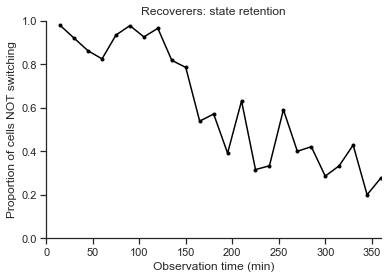

In [28]:
sns.set_style('ticks')
sns.set_context('notebook')

f, ax = plt.subplots()
plt.plot(times, [1-recoverer_means.loc[x]['switch'] for x in times], marker = '.', color = 'black')

ax.set_xlim(0, 360)
ax.set_ylim(0, 1)

ax.set_title('Recoverers: state retention')
ax.set_xlabel('Observation time (min)')
ax.set_ylabel('Proportion of cells NOT switching')

sns.despine()

In [29]:
def poisson_k0_with_time(t, r):
    return np.exp(-r*t)

In [30]:
# fit to the k=0 case of a poisson
[r_recoverers, pcov_recoverers] = scipy.optimize.curve_fit(poisson_k0_with_time, times, 
                                                           [1-recoverer_means.loc[x]['switch'] for x in times], p0 = 0.2)

In [31]:
r_recoverers
# in units of minutes-1

array([0.00299904])

In [32]:
# convert to hr-1
r_recoverers*60

array([0.1799423])

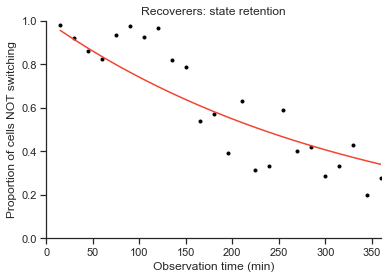

In [33]:
sns.set_style('ticks')
sns.set_context('notebook')

f, ax = plt.subplots()
plt.scatter(times, [1-recoverer_means.loc[x]['switch'] for x in times], marker = '.', color = 'black')
plt.plot(times, poisson_k0_with_time(times, r_recoverers), color = reds[5])

ax.set_xlim(0, 360)
ax.set_ylim(0, 1)

ax.set_title('Recoverers: state retention')
ax.set_xlabel('Observation time (min)')
ax.set_ylabel('Proportion of cells NOT switching')

sns.despine()

In [34]:
# switching rate, recoverers > arresters:
print('r_rec = ' + str(float(r_recoverers*60)) + ' +/- ' 
      + str(float((pcov_recoverers**0.5)*60)) + str(' hr-1'))

r_rec = 0.17994230041911954 +/- 0.01616361977744488 hr-1


## Rate-switching: arrresters > recoverers

In [35]:
arrester_means = df_ori_arresters.groupby('time_observed').mean()

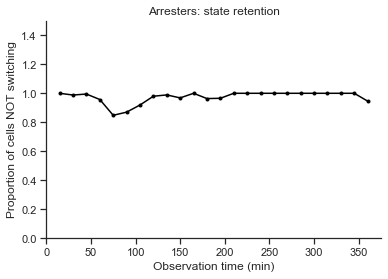

In [36]:
sns.set_style('ticks')
sns.set_context('notebook')

f, ax = plt.subplots()
plt.plot(times, [1-arrester_means.loc[x]['switch'] for x in times], marker = '.', color = 'black')

ax.set_xlim(0, 375)
ax.set_ylim(0, 1.5)

ax.set_title('Arresters: state retention')
ax.set_xlabel('Observation time (min)')
ax.set_ylabel('Proportion of cells NOT switching')

sns.despine()

### Hm. This rate goes _up_ after two hours.
#### The overall rate is clearly very small. So it's likely being dominated by a relatively high probability of switching back at higher observation times
#### Solution: only analyze the probability of switching over a smaller time frame-- ~<2 hr
#### Values consistently decrease until the sixth time point; use these first six time points: 90 min observation windows or less

In [37]:
times_sub = times[:6]

In [38]:
[r_arresters, pcov_arresters] = scipy.optimize.curve_fit(poisson_k0_with_time, 
                                                         times_sub, [1-arrester_means.loc[x]['switch'] for x in times_sub],
                                                         p0 = 0.01)
print('r_arresters-to-recoverers: ' + str(r_arresters*60))

r_arresters-to-recoverers: [0.07996283]


In [39]:
# switching rate, arresters > recoverers:
print('r_arr = ' + str(float(r_arresters*60)) + ' +/- ' 
      + str(float((pcov_arresters**0.5)*60)) + str(' hr-1'))

r_arr = 0.0799628321099925 +/- 0.019152343124212275 hr-1


## r-squared of fits

In [40]:
residuals_recoverers = [(1-recoverer_means.loc[x]['switch']) - poisson_k0_with_time(x, r_recoverers) for x in times]
ss_res_recoverers = np.sum([x**2 for x in residuals_recoverers])
ss_tot_recoverers = np.sum([((1-recoverer_means.loc[x]['switch']) - (1-recoverer_means.mean()['switch']))**2 for x in times])
r2_recoverers = 1 - (ss_res_recoverers/ss_tot_recoverers)
r2_recoverers

0.7668004631154843

In [41]:
residuals_arresters = [(1-arrester_means.loc[x]['switch']) - poisson_k0_with_time(x, r_arresters) for x in times_sub]
ss_res_arresters = np.sum([x**2 for x in residuals_arresters])
ss_tot_arresters = np.sum([((1-arrester_means.loc[x]['switch']) - (1-arrester_means.mean()['switch']))**2 for x in times_sub])
r2_arresters = 1 - (ss_res_arresters / ss_tot_arresters)
r2_arresters

0.7016988128040846